# EDA Analysis

## Background

The dataset sourced from the [UCI Machine Learning Repo](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) contains `4424` student entries with 36 features and one categorical target varaible. The goal is to predict student academic success (dropout or graduate) from the 36 input features.

In [1]:
!pip install ucimlrepo  --quiet
from visualization_utils import *
from file_utils import * 
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

In [2]:
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata 
metadata = predict_students_dropout_and_academic_success.metadata

# variable information 
variable_info = predict_students_dropout_and_academic_success.variables
df = X
df['dropout'] = y
print(f"{df.shape[0]} entries with {df.shape[1]} features")

4424 entries with 37 features


In [3]:
predict_students_dropout_and_academic_success.variables['name']
ds_vars = predict_students_dropout_and_academic_success.variables['name']
ds_desc = predict_students_dropout_and_academic_success.variables['description']
# need to create forward mappings for each one of the variables
quantitative_vars = {'Application mode',
'Application order',
'Previous qualification (grade)',
'Admission grade',
'Age at enrollment',
"Curricular units 1st sem (credited)",
"Curricular units 1st sem (enrolled)",
"Curricular units 1st sem (evaluations)",
"Curricular units 1st sem (approved)",
"Curricular units 1st sem (grade)",
"Curricular units 1st sem (without evaluations)",
"Curricular units 2nd sem (credited)",
"Curricular units 2nd sem (enrolled)",
"Curricular units 2nd sem (evaluations)",
"Curricular units 2nd sem (approved)",
"Curricular units 2nd sem (grade)",
"Curricular units 2nd sem (without evaluations)",
"Unemployment rate",
"Inflation rate",
"GDP",
"Target",
}

variable_map = generate_variable_map(quantitative_vars, ds_vars, ds_desc)

# Analysis of Categorical Variables Affecting Student Performance

To gain a better understanding of variables responsibel for controlling the 

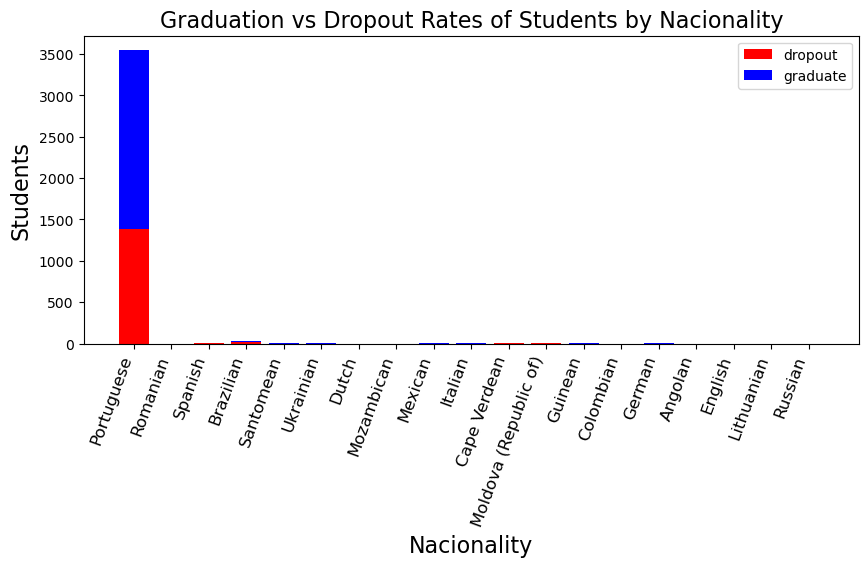

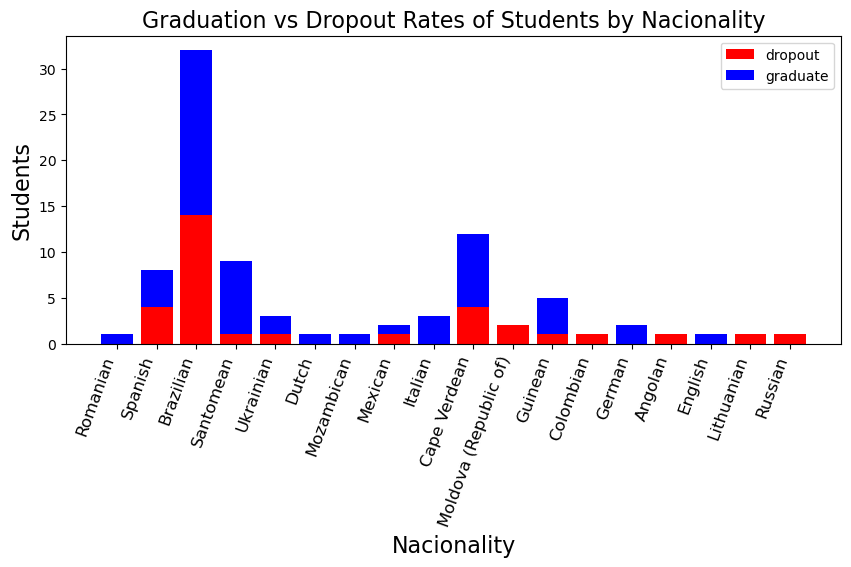

In [4]:
finished_df = df[df['dropout'].isin(['Dropout', 'Graduate'])]
generate_general_stacked_bar_graph(finished_df, variable_map, 'Nacionality')
tmp_df = finished_df.drop(finished_df.loc[finished_df['Nacionality']==1].index)
generate_general_stacked_bar_graph(tmp_df, variable_map, 'Nacionality')

In [5]:
df

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [6]:
tmp = df["Daytime/evening attendance"].value_counts()
tmp2 = df[df["dropout"] == "Dropout"]["Daytime/evening attendance"].value_counts()
print([(variable_map["Daytime/evening attendance"][c], float(tmp[c])/df.shape[0]) for c, v in tmp.items() if c in variable_map["Daytime/evening attendance"]])
[(variable_map["Daytime/evening attendance"][c], float(tmp2[c])/tmp[c]) for c, v in tmp.items() if c in variable_map["Daytime/evening attendance"]]

[('daytime', 0.8908227848101266), ('evening', 0.10917721518987342)]


[('daytime', 0.30804364374524235), ('evening', 0.42857142857142855)]

In [7]:
tmp = df["Gender"].value_counts()
tmp2 = df[df["dropout"] == "Dropout"]["Gender"].value_counts()
print([(variable_map["Gender"][c], float(tmp[c])/df.shape[0]) for c, v in tmp.items() if c in variable_map["Gender"]])
[(variable_map["Gender"][c], float(tmp2[c])/tmp[c]) for c, v in tmp.items() if c in variable_map["Gender"]]

[('female', 0.6482820976491862), ('male', 0.35171790235081374)]


[('female', 0.2510460251046025), ('male', 0.4505141388174807)]

In [8]:
tmp = df["Marital Status"].value_counts()
tmp2 = df[df["dropout"] == "Dropout"]["Marital Status"].value_counts()
[(variable_map["Marital Status"][c], float(tmp2[c])/tmp[c]) for c, v in tmp.items() if c in variable_map["Marital Status"]]

[('single', 0.3021178872161266),
 ('married', 0.47229551451187335),
 ('divorced', 0.46153846153846156),
 ('facto union', 0.44),
 ('legally separated', 0.6666666666666666),
 ('widower', 0.25)]

In [9]:


counts = df["Course"].value_counts()

drop_out_df = df[df["dropout"] == 'Dropout']
drop_counts = drop_out_df["Course"].value_counts()

print(drop_counts)
print(counts)
df["Course"].value_counts()
[(variable_map['Course'][c], float(drop_counts[c]) / v, v) for c, v in counts.items() if c in variable_map['Course']]

Course
9991    136
9147    134
9500    118
9773    101
9254     96
9670     95
9119     92
9085     90
9003     86
9853     85
171      82
9130     78
8014     71
9238     65
9070     51
9556     33
33        8
Name: count, dtype: int64
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64


[('Nursing', 0.15404699738903394, 766),
 ('Management', 0.3526315789473684, 380),
 ('Social Service', 0.18309859154929578, 355),
 ('Veterinary Nursing', 0.26706231454005935, 337),
 ('Journalism and Communication', 0.30513595166163143, 331),
 ('Advertising and Marketing Management', 0.35447761194029853, 268),
 ('Management (evening attendance)', 0.5074626865671642, 268),
 ('Tourism', 0.38095238095238093, 252),
 ('Communication Design', 0.22566371681415928, 226),
 ('Animation and Multimedia Design', 0.3813953488372093, 215),
 ('Social Service (evening attendance)', 0.3302325581395349, 215),
 ('Agronomy', 0.4095238095238095, 210),
 ('Basic Education', 0.4427083333333333, 192),
 ('Informatics Engineering', 0.5411764705882353, 170),
 ('Equinculture', 0.5531914893617021, 141),
 ('Oral Hygiene', 0.38372093023255816, 86),
 ('Biofuel Production Technologies', 0.6666666666666666, 12)]

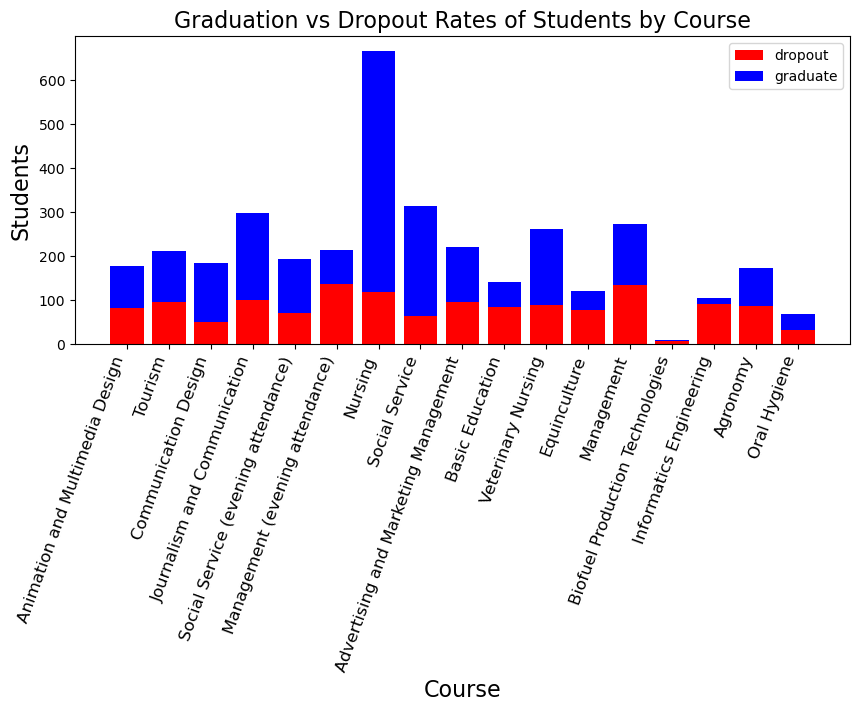

In [10]:
generate_general_stacked_bar_graph(finished_df, variable_map, 'Course')



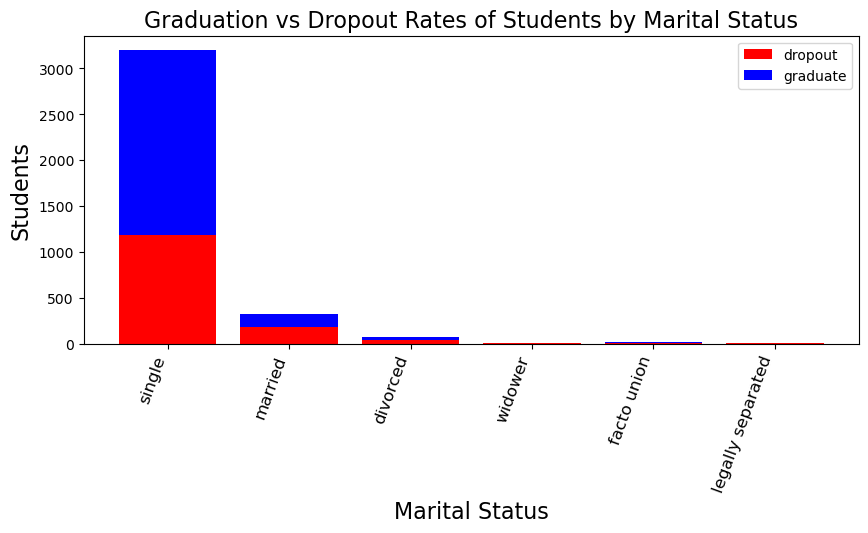

In [11]:
generate_general_stacked_bar_graph(finished_df, variable_map, 'Marital Status')


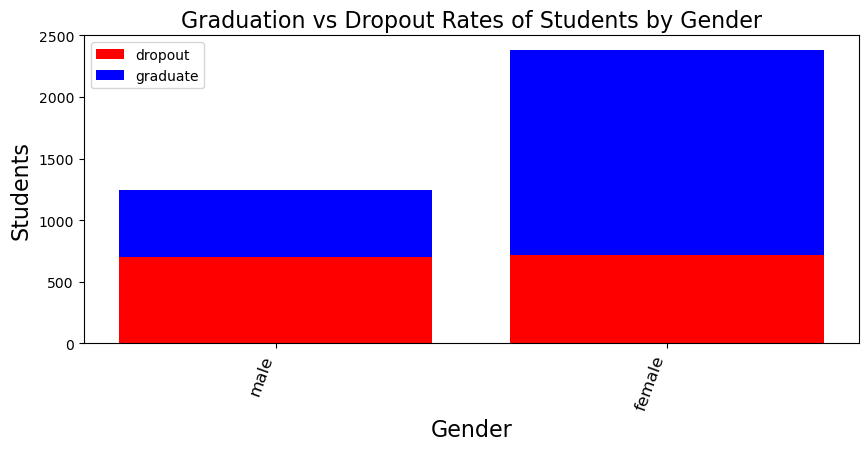

In [12]:
generate_general_stacked_bar_graph(finished_df, variable_map, 'Gender')


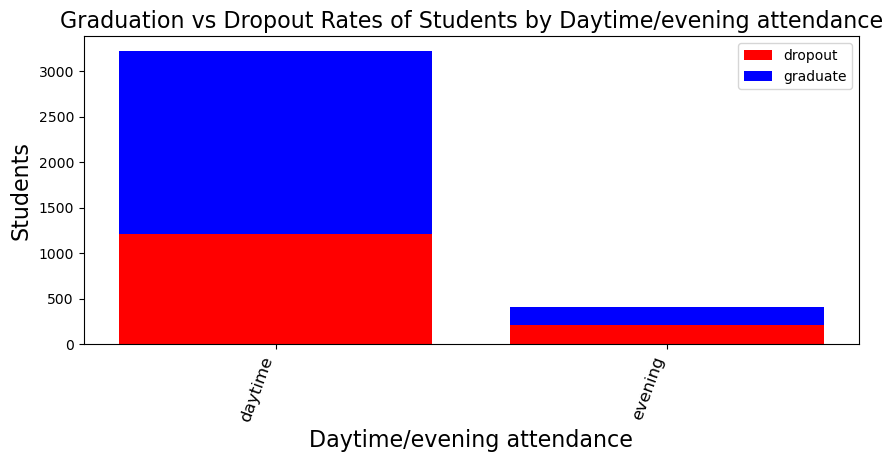

In [13]:
generate_general_stacked_bar_graph(finished_df, variable_map, 'Daytime/evening attendance')

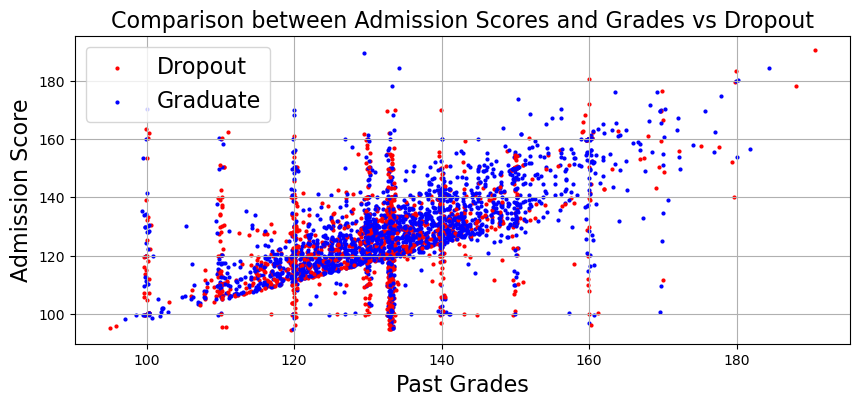

In [14]:
PREV_QUAL = 'Previous qualification (grade)'
ADMISSION_GRADE = 'Admission grade' 
tmp = df[[PREV_QUAL, ADMISSION_GRADE, 'dropout']]
finished_df = tmp[tmp['dropout'].isin(['Dropout', 'Graduate'])]

jitter_plot(finished_df)

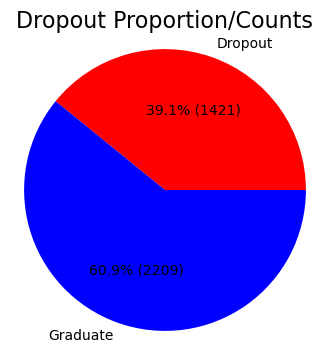

In [15]:
pie_chart(df[df["dropout"] != "Enrolled"]['dropout'])


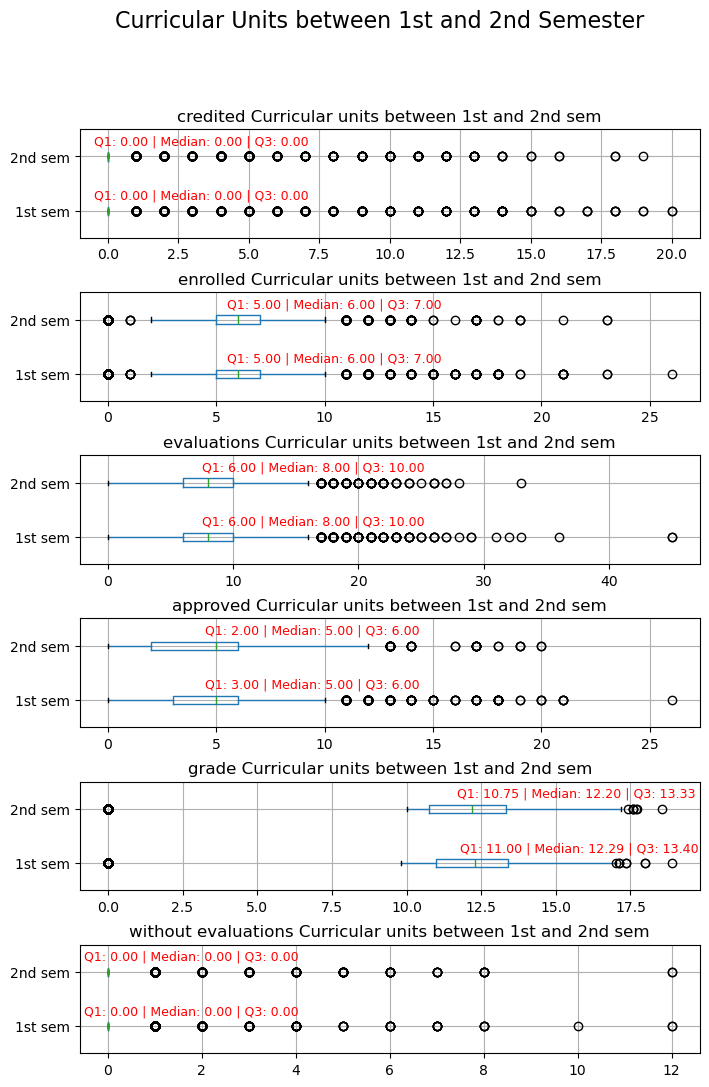

In [16]:
curriculum_units = [
    "Curricular units 1st sem (credited)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (without evaluations)",
]
first_sem_curriculum = {unit for unit in curriculum_units if '1' in unit}
second_sem_curriculum = set(curriculum_units) - first_sem_curriculum

plot_semester_compare_bp(df, curriculum_units)

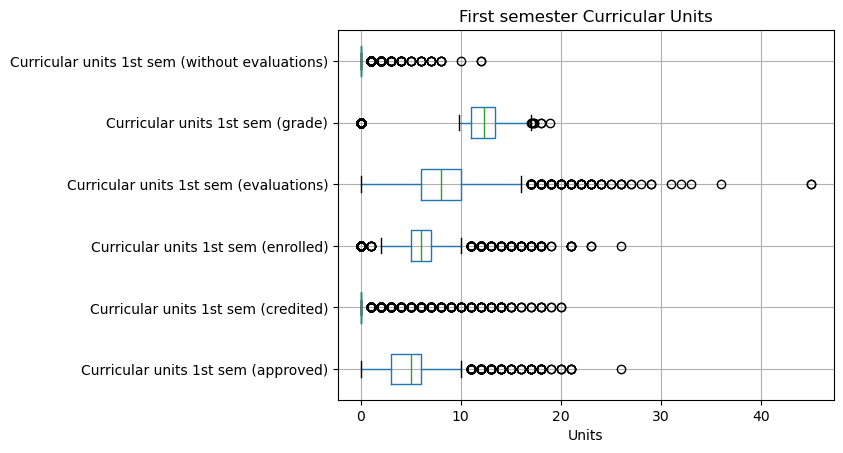

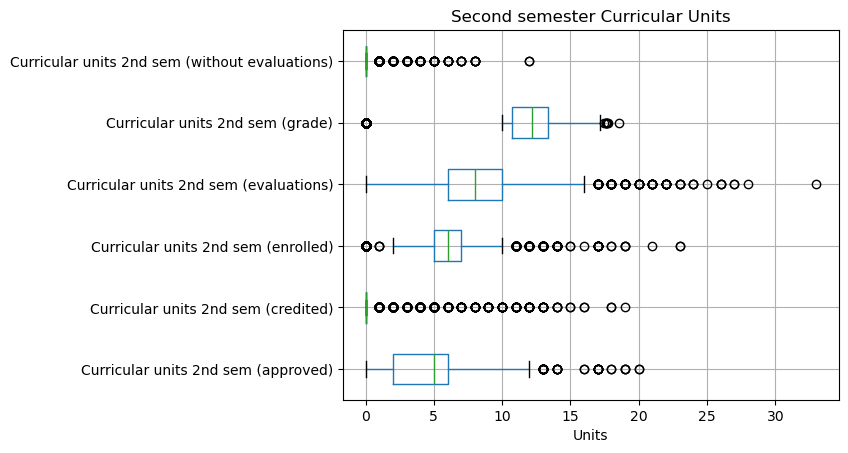

In [17]:
# will not plot first and semester comparison
df[sorted(list(first_sem_curriculum))].boxplot(vert=False)
plt.title("First semester Curricular Units")
plt.xlabel("Units")
plt.show()
df[sorted(list(second_sem_curriculum))].boxplot(vert=False)
plt.title("Second semester Curricular Units")
plt.xlabel("Units")
plt.show()


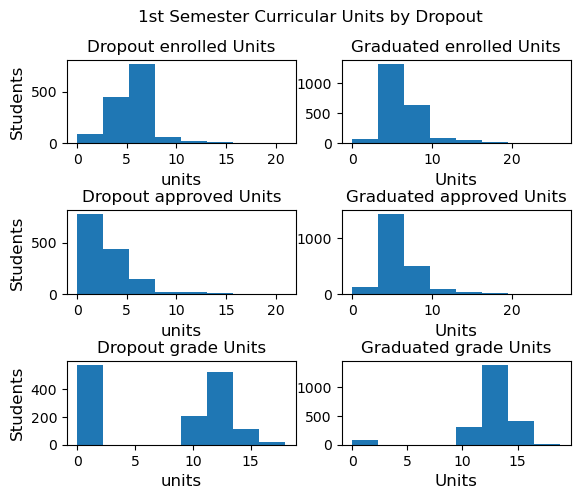

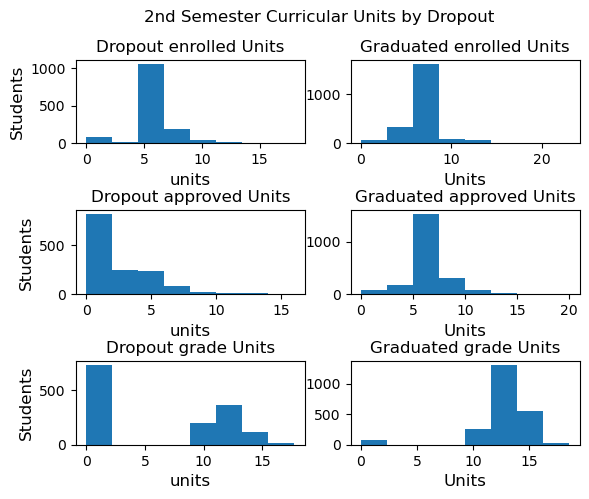

In [18]:
def calc_filtered(sem, filtered_units):
    if '1' in sem:
        filtered_units = [x for x in filtered_units if '1' in x]
    else:
        filtered_units = [x for x in filtered_units if '2' in x]
    plot_df = df[list(filtered_units) + ['dropout']]
    if '1' in sem:
        clean_text = lambda x: re.sub(r'(Curricular units 1st sem |\(|\))', '', x)
    else:
        clean_text = lambda x: re.sub(r'(Curricular units 2nd sem |\(|\))', '', x)

    plot_df = plot_df.rename(columns={x: clean_text(x) for x in filtered_units})
    units = [clean_text(x) for x in filtered_units]
    # plot_df.boxplot(vert=False)

    fig, axes = plt.subplots(len(filtered_units), 2, figsize=(6.5, 5))
    fig.subplots_adjust(hspace=0.8)

    for i, ax in enumerate(axes):
        dropout = plot_df[plot_df['dropout'] == "Dropout"][units[i]].to_numpy()
        graduate = plot_df[plot_df['dropout'] == "Graduate"][units[i]].to_numpy()

        # ax.boxplot([dropout, graduate], labels=["Dropout", "Graduate"], vert=False)
        ax[0].hist(dropout, bins=8)
        ax[0].set_title(f"Dropout {units[i]} Units",fontsize=12)
        ax[0].set_xlabel(f"units",fontsize=12)
        ax[0].set_ylabel(f"Students",fontsize=12)
        ax[1].hist(graduate, bins=8)
        ax[1].set_xlabel(f"Units",fontsize=12)
        # ax[1].set_ylabel(f"Students",fontsize=12)
        ax[1].set_title(f"Graduated {units[i]} Units",fontsize=12)
    # Set a common title for the whole figure
    if '1' in sem:
        fig.suptitle("1st Semester Curricular Units by Dropout", fontsize=12)
    else:
        fig.suptitle("2nd Semester Curricular Units by Dropout", fontsize=12)

    # Display the plots
    plt.show()
filtered_units = [unit for unit in curriculum_units if "without evaluations" not in unit and "credited" not in unit and "evaluations" not in unit]
calc_filtered('sem1', filtered_units)
calc_filtered('sem2', filtered_units)



['Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']


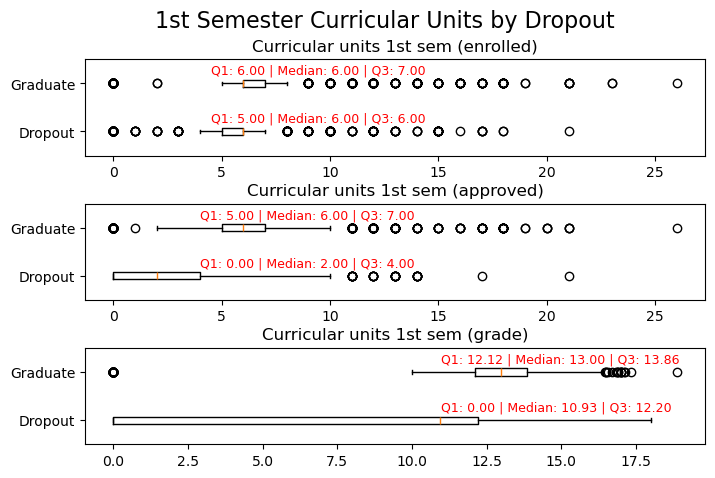

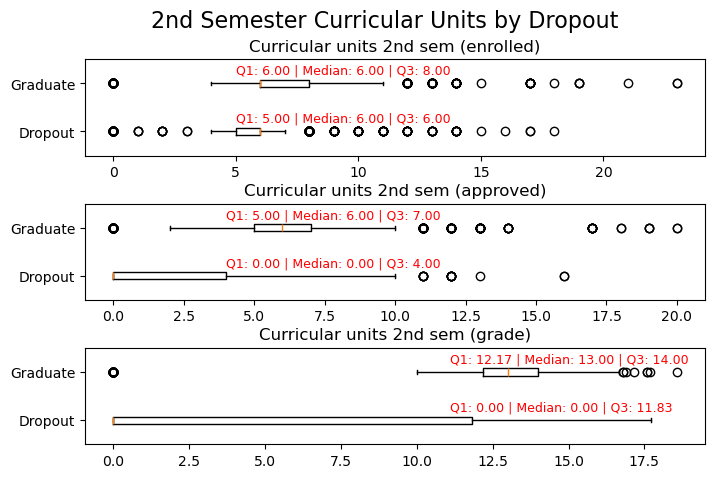

In [19]:
filtered_units = [unit for unit in curriculum_units if "without evaluations" not in unit and "credited" not in unit and "evaluations" not in unit]
print(filtered_units)
plot_grad_drop_compare_bp(df, filtered_units, '1')
plot_grad_drop_compare_bp(df, filtered_units, '2')

[-0.8, 0.6, -0.3, 0.3, 1.4, 2.6, 2.8, 3.7]


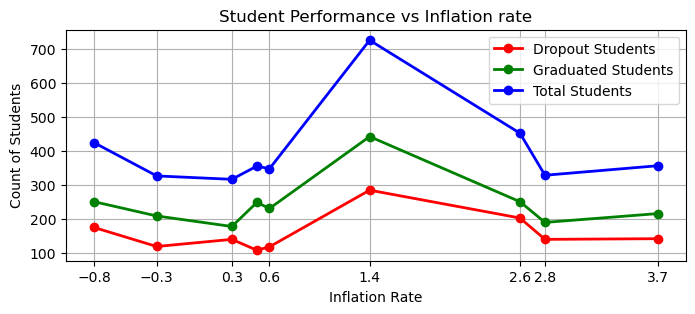

[-0.92, 0.79, 2.02, 3.51, 0.32, -4.06, -3.12, -1.7]


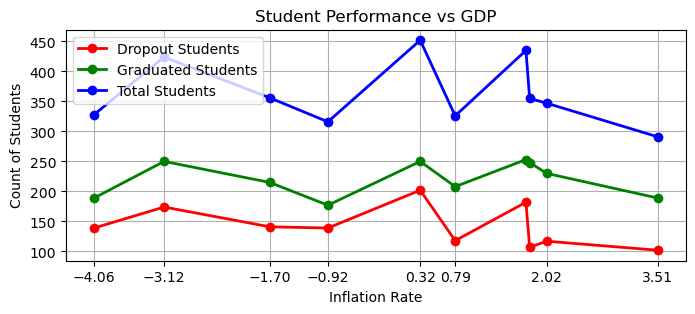

[7.6, 8.9, 9.4, 10.8, 12.4, 13.9, 15.5, 16.2]


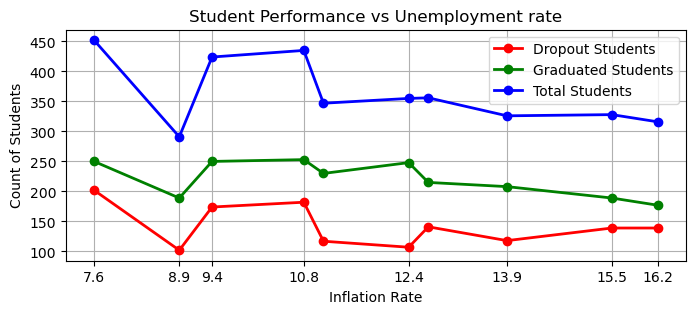

In [20]:
plot_line_graph(df, 'Inflation rate')
plot_line_graph(df, 'GDP')
plot_line_graph(df, 'Unemployment rate')

# Affect of Parental Education on Student Performance

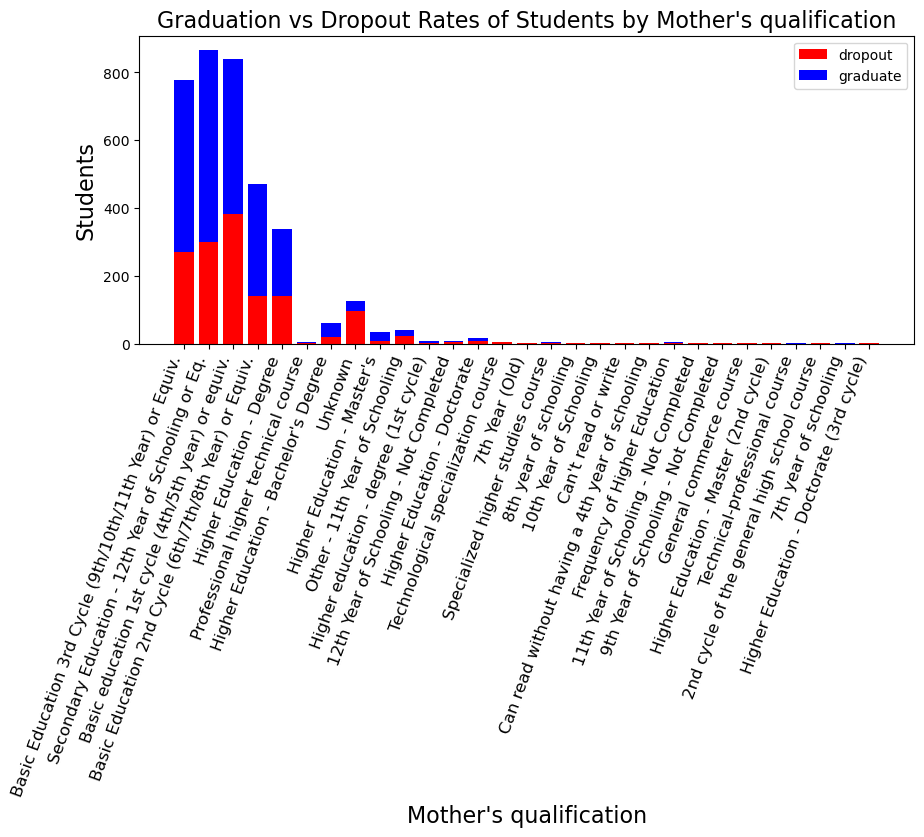

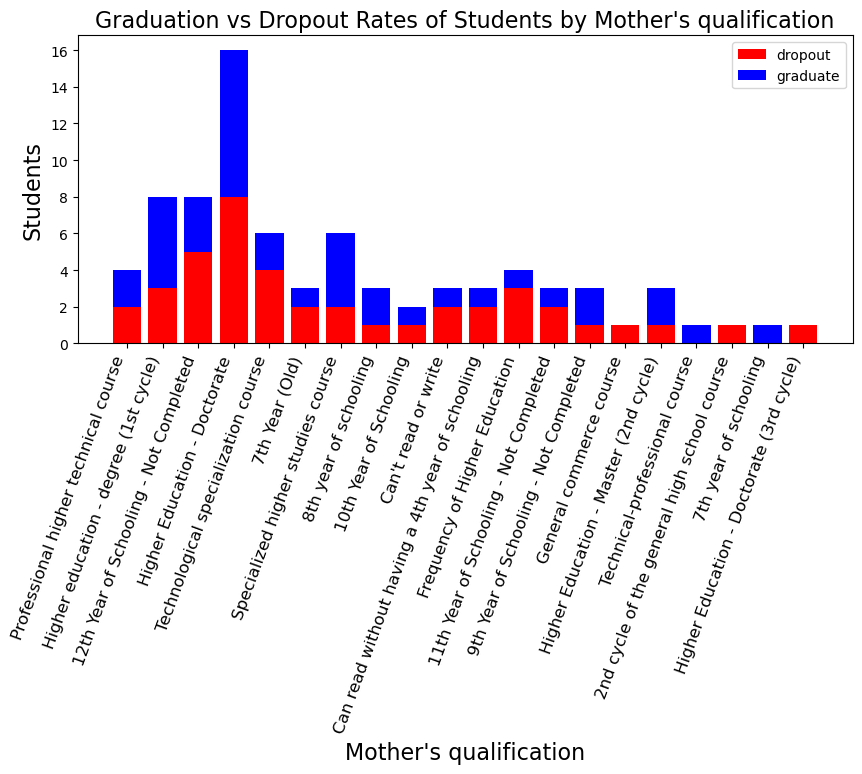

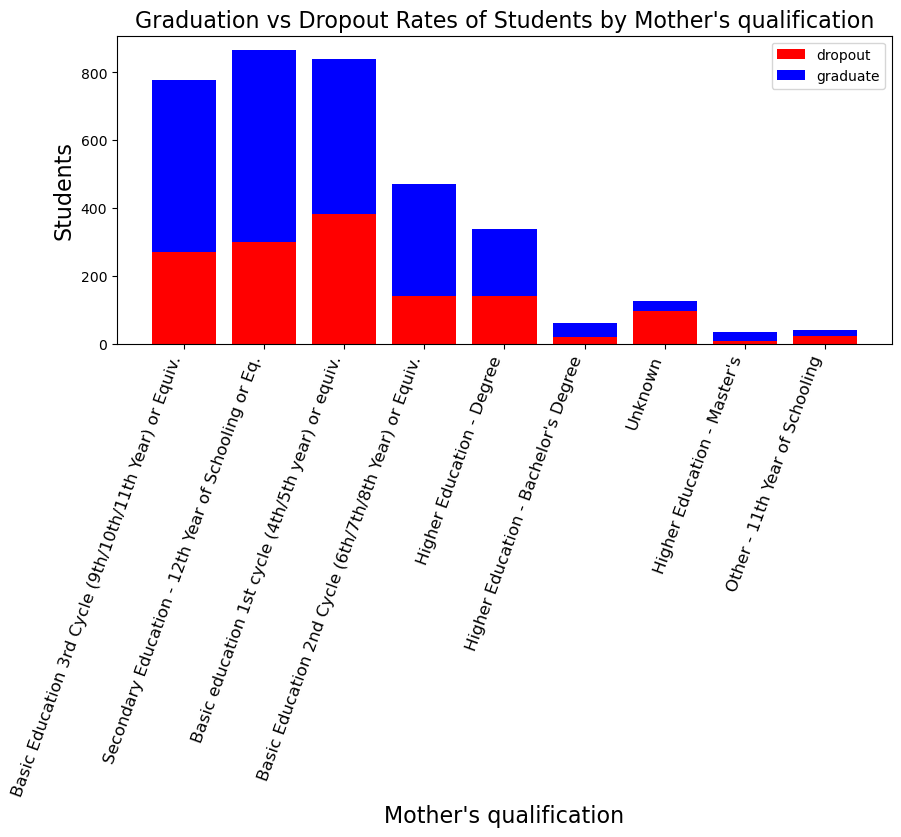

In [21]:
finished_df = df[df['dropout'].isin(['Dropout', 'Graduate'])]
# filtering out sample categories
mother_quals = finished_df['Mother\'s qualification'].value_counts()
low_mother_quals = list(filter(lambda qual: mother_quals[qual] > 20, mother_quals.keys()))
high_mother_quals = list(filter(lambda qual: mother_quals[qual] < 20, mother_quals.keys()))
low_finished_df = finished_df.loc[~(finished_df['Mother\'s qualification'].isin(low_mother_quals))]
high_finished_df = finished_df.loc[~(finished_df['Mother\'s qualification'].isin(high_mother_quals))]

generate_general_stacked_bar_graph(finished_df, variable_map, 'Mother\'s qualification')
generate_general_stacked_bar_graph(low_finished_df, variable_map, 'Mother\'s qualification')
generate_general_stacked_bar_graph(high_finished_df, variable_map, 'Mother\'s qualification')

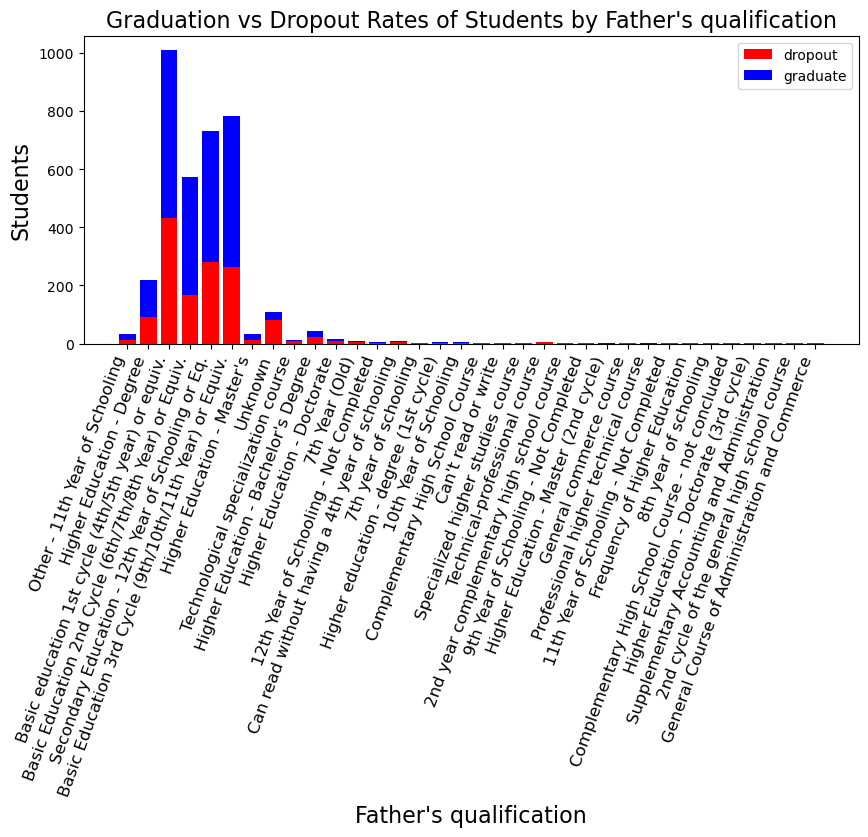

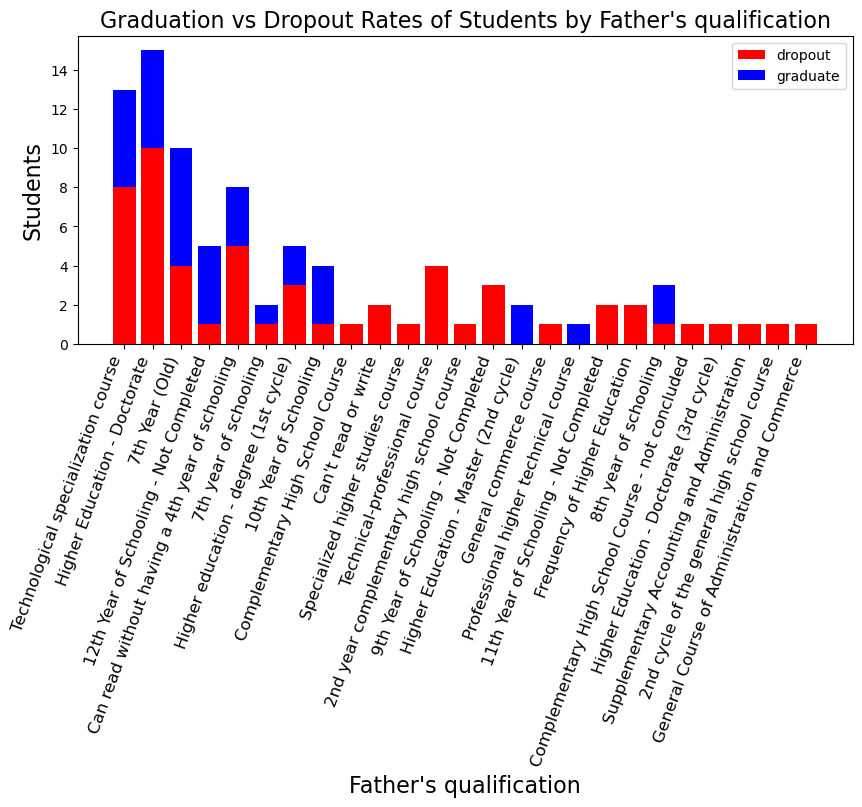

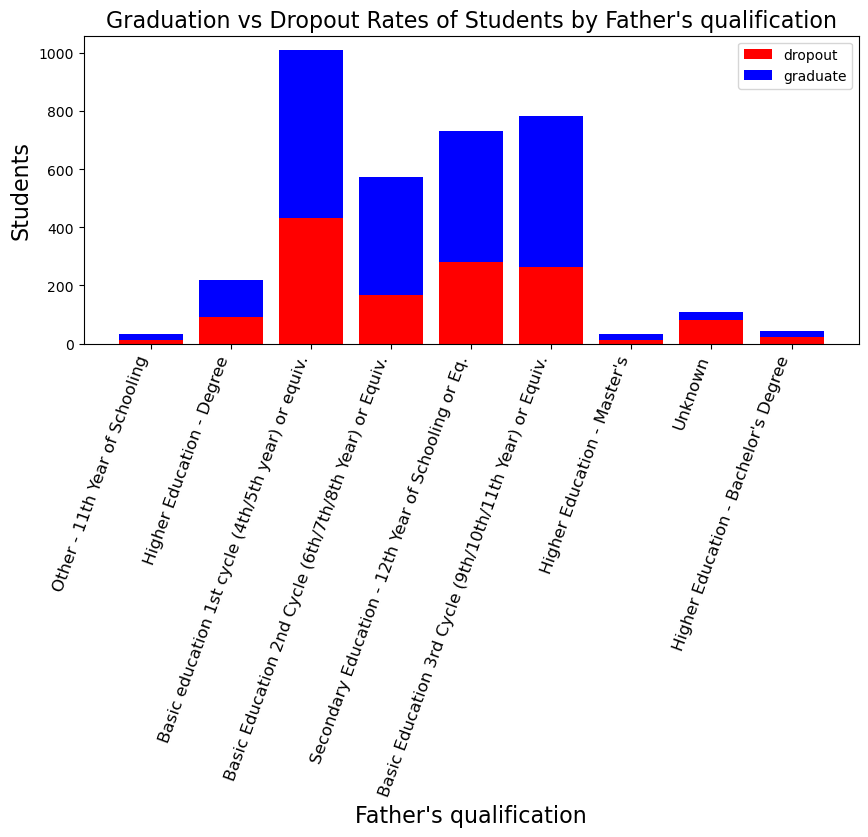

In [22]:
finished_df = df[df['dropout'].isin(['Dropout', 'Graduate'])]
# filtering out sample categories
father_quals = finished_df['Father\'s qualification'].value_counts()
low_mother_quals = list(filter(lambda qual: father_quals[qual] > 20, father_quals.keys()))
high_mother_quals = list(filter(lambda qual: father_quals[qual] < 20, father_quals.keys()))
low_finished_df = finished_df.loc[~(finished_df['Father\'s qualification'].isin(low_mother_quals))]
high_finished_df = finished_df.loc[~(finished_df['Father\'s qualification'].isin(high_mother_quals))]

generate_general_stacked_bar_graph(finished_df, variable_map, 'Father\'s qualification')
generate_general_stacked_bar_graph(low_finished_df, variable_map, 'Father\'s qualification')
generate_general_stacked_bar_graph(high_finished_df, variable_map, 'Father\'s qualification')
